# Training Model

In [49]:
import pandas as pd
import numpy as np

df = pd.read_csv("i:\\Projects\\housePricePredictor\\src\\data\\Housing.csv")
df2 = pd.read_csv("i:\\Projects\\housePricePredictor\\src\\data\\final_data.csv")

df['price_log'] = np.log(df['price'])

df.drop(columns=['price'], inplace=True)

df.head()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_log
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,16.403275
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,16.321036
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,16.321036
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,16.318175
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,16.250001


In [50]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [51]:

from sklearn.preprocessing import LabelEncoder

yes_no_cols = categorical_columns[df[categorical_columns].nunique() == 2]
yes_no_cols = yes_no_cols.tolist()
yes_no_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea']

In [52]:
data = pd.get_dummies(df,columns=yes_no_cols,drop_first=True)
data.head()

,area,bedrooms,bathrooms,stories,parking,furnishingstatus,price_log,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,7420,4,2,3,2,furnished,16.403275,True,False,False,False,True,True
1,8960,4,4,4,3,furnished,16.321036,True,False,False,False,True,False
2,9960,3,2,2,2,semi-furnished,16.321036,True,False,True,False,False,True
3,7500,4,2,2,3,furnished,16.318175,True,False,True,False,True,True
4,7420,4,1,2,2,furnished,16.250001,True,True,True,False,True,False


In [53]:
le = LabelEncoder()
data['furnishingstatus'] = le.fit_transform(data['furnishingstatus'])
data.head()

,area,bedrooms,bathrooms,stories,parking,furnishingstatus,price_log,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,7420,4,2,3,2,0,16.403275,True,False,False,False,True,True
1,8960,4,4,4,3,0,16.321036,True,False,False,False,True,False
2,9960,3,2,2,2,1,16.321036,True,False,True,False,False,True
3,7500,4,2,2,3,0,16.318175,True,False,True,False,True,True
4,7420,4,1,2,2,0,16.250001,True,True,True,False,True,False


### Split Features (X) and Target (y)

In [54]:
X = data.drop(columns=['price_log'])
y = data['price_log']

X.head()

,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,7420,4,2,3,2,0,True,False,False,False,True,True
1,8960,4,4,4,3,0,True,False,False,False,True,False
2,9960,3,2,2,2,1,True,False,True,False,False,True
3,7500,4,2,2,3,0,True,False,True,False,True,True
4,7420,4,1,2,2,0,True,True,True,False,True,False


In [30]:
y.head()

0    16.403275
1    16.321036
2    16.321036
3    16.318175
4    16.250001
Name: price_log, dtype: float64

### Train-Test Split

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [56]:
X_train.head()

,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
46,6000,3,2,4,1,0,True,False,False,False,True,False
93,7200,3,2,1,3,1,True,False,True,False,True,False
335,3816,2,1,1,2,0,True,False,True,False,True,False
412,2610,3,1,2,0,2,True,False,True,False,False,True
471,3750,3,1,2,0,2,True,False,False,False,False,False


In [57]:
X_test.head()

,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
316,5900,4,2,2,1,2,False,False,True,False,False,False
77,6500,3,2,3,0,0,True,False,False,False,True,True
360,4040,2,1,1,0,1,True,False,False,False,False,False
90,5000,3,1,2,0,1,True,False,False,False,True,False
493,3960,3,1,1,0,0,True,False,False,False,False,False


In [58]:
y_train.head()

46     15.833741
93     15.656060
335    15.181602
412    15.048071
471    14.917451
Name: price_log, dtype: float64

In [59]:
y_test.head()

316    15.216694
77     15.710127
360    15.126542
90     15.678039
493    14.845130
Name: price_log, dtype: float64

### Train a Linear Regression Model

In [60]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Train (fit) the model on training data
model.fit(X_train, y_train)


y_pred_log = model.predict(X_test)

y_pred_log


array([15.35001359, 15.80546038, 14.97694275, 15.28005999, 15.05181051,
       15.06985903, 15.4994546 , 15.67508192, 14.86280307, 14.88020972,
       16.2152234 , 14.91468526, 14.94707635, 15.02497597, 15.1206961 ,
       15.32485744, 14.96080444, 15.30840086, 15.24842237, 15.07096176,
       15.51301875, 15.56767748, 14.90101413, 15.33084537, 15.41409184,
       15.85484812, 15.03025624, 15.43235561, 16.03243622, 15.06594611,
       15.64768047, 15.01643404, 15.71076361, 15.20371329, 15.07981023,
       15.48723752, 15.34040885, 15.25814959, 14.95709629, 15.28761399,
       15.26256217, 15.05391915, 15.80162287, 15.18258602, 15.10693842,
       15.19963376, 15.68028558, 15.16805201, 15.11212517, 15.04600517,
       15.76895645, 14.9074271 , 15.25058425, 15.24594884, 15.12639884,
       14.89028318, 15.82942455, 14.94435167, 15.2173309 , 14.90825743,
       15.30063266, 15.00930022, 15.35851884, 15.21875105, 15.28716488,
       15.27419679, 15.81765985, 15.07416628, 15.52976817, 15.64

### Convert Predictions Back to Actual Price

In [61]:
import numpy as np

y_pred = np.exp(y_pred_log) # Convert log price back to actual price
y_test_actual = np.exp(y_test) # Convert actual test values back too

### View Model Coefficients

In [62]:
coefficients = pd.DataFrame(
    {
        'Feature': X_train.columns,
        'Coefficient': model.coef_
    }
).sort_values(by='Coefficient', ascending=False)

print(coefficients)

                Feature  Coefficient
2             bathrooms     0.188820
10  airconditioning_yes     0.153816
9   hotwaterheating_yes     0.132345
11         prefarea_yes     0.125736
6          mainroad_yes     0.111160
8          basement_yes     0.101033
3               stories     0.081718
7         guestroom_yes     0.055023
4               parking     0.037545
1              bedrooms     0.021532
0                  area     0.000048
5      furnishingstatus    -0.057173


### Evaluate Model Performance

In [63]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test_actual, y_pred_log)
print(f"R² Score : {r2:.4f}")

mae = mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))

print(f"Mean Absolute Error (MAE): {mae:,.0f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.0f}")

R² Score : -4.9609
Mean Absolute Error (MAE): 981,133
Root Mean Squared Error (RMSE): 1,330,051


### Using different model because Linear Regression was way off

In [76]:
from sklearn.ensemble import RandomForestRegressor

# Create the Model 
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train it 
rf_model.fit(X_train,y_train)

y_pred_log_rf = rf_model.predict(X_test)
y_pred_rf = np.exp(y_pred_log_rf)  # Convert log price back to actual price
y_test_actual_rf = np.exp(y_test)  # Convert actual test values back too



In [65]:
print("R² Score (log):", r2_score(y_test, y_pred_log_rf))
print("MAE:", mean_absolute_error(y_test_actual, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test_actual, y_pred_rf)))

R² Score (log): 0.6335977321899692
MAE: 1016099.0732936417
RMSE: 1426021.4119622023


### Observing the most important features

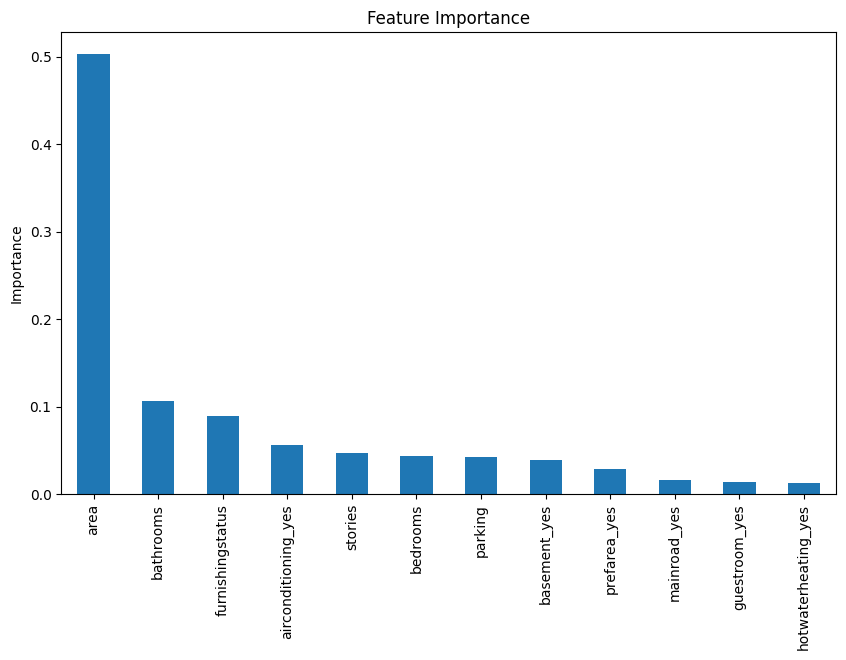

In [66]:
import matplotlib.pyplot as plt

importance = rf_model.feature_importances_
feature = X_train.columns

feat_mp = pd.Series(importance, index=feature).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feat_mp.plot(kind='bar')

plt.title("Feature Importance")

plt.ylabel("Importance")

plt.show()

### Hyperparameter Tuning (to improve performance)
We can make Random Forest smarter by tuning:

- n_estimators: Number of trees

- max_depth: Max depth of each tree (controls overfitting)

- min_samples_split: Minimum samples to split a node

- min_samples_leaf: Minimum samples in a leaf

In [68]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid 
param_grid ={
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv = 5,
    n_jobs=-1,
    scoring='r2'
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_params = grid_search.best_params_
rf_best = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)
rf_best.fit(X_train, y_train)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


,n_estimators,300
,criterion,'squared_error'
,max_depth,10
,min_samples_split,10
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [69]:
# Predict on test data
y_pred_log_best = rf_best.predict(X_test)

# Convert back to actual price
y_pred_best = np.exp(y_pred_log_best)
y_test_actual = np.exp(y_test)

# Evaluate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("R² Score (log):", r2_score(y_test, y_pred_log_best))
print("MAE:", mean_absolute_error(y_test_actual, y_pred_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test_actual, y_pred_best)))


R² Score (log): 0.6217141423911263
MAE: 1046247.6208895212
RMSE: 1460230.9231553397


### Visualize Actual vs Predicted Prices

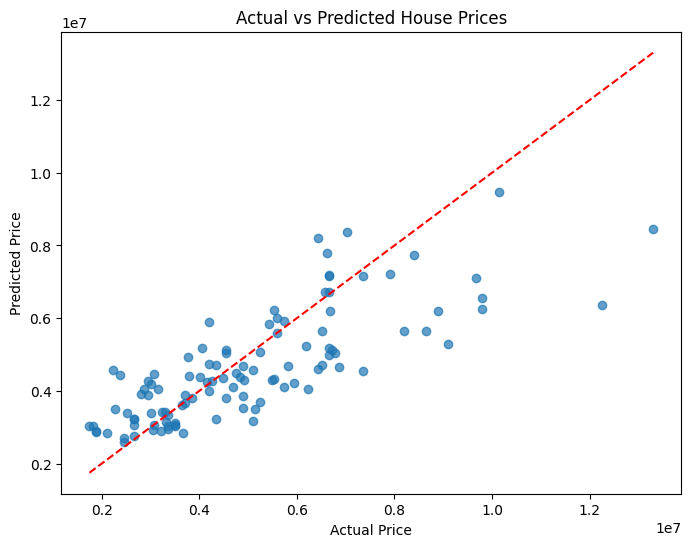

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test_actual, y_pred_best, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test_actual.min(), y_test_actual.max()], 
         [y_test_actual.min(), y_test_actual.max()], 'r--')  # Perfect prediction line
plt.show()

### Saving Model

In [73]:
import joblib


joblib.dump(rf_best, "../model/house_price_rf_model.pkl")

print("Model saved successfully!")


Model saved successfully!
